<a href="https://colab.research.google.com/github/siim2mary/mkdir-my_projects/blob/main/churn_assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer churn

Data Preprocessing

IMPORT LIBRARIES

---



In [ ]:
import os,sys
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

Load dataset

---



In [ ]:
customer_churn = pd.read_excel('/content/customer_churn_large_dataset.xlsx')


In [ ]:
customer_churn.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
customer_churn.shape

(100000, 9)

In [ ]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


To find null and missing data values

In [ ]:
customer_churn.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Inference:- There are no null values

To check duplicates

In [ ]:
customer_churn.duplicated().sum()

0

Inference:- There are no duplicates

To find Outliers we use boxplots

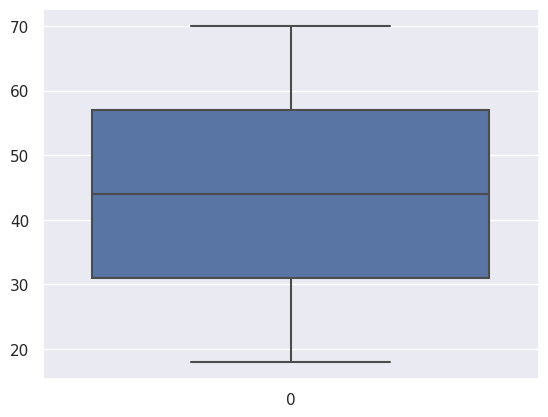

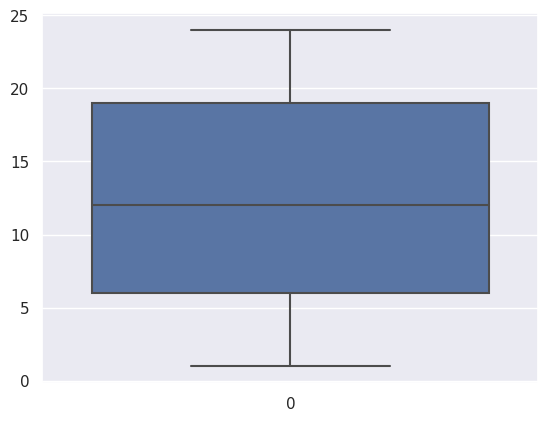

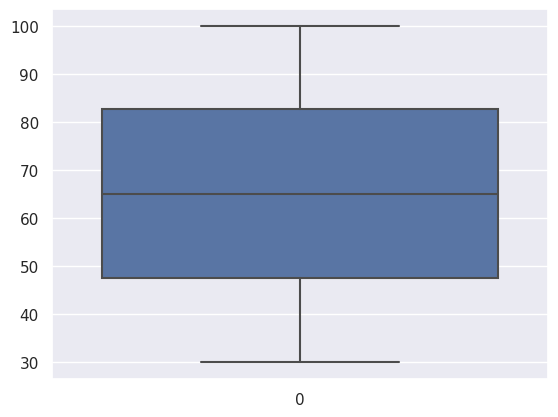

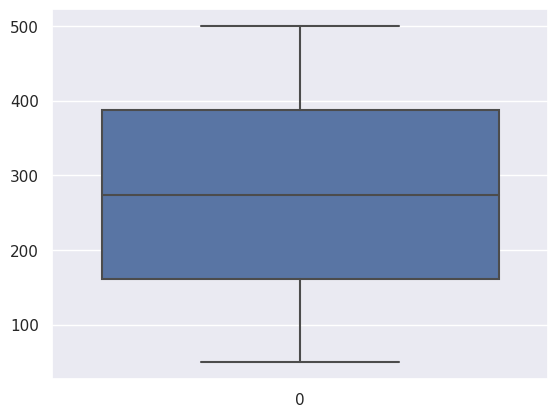

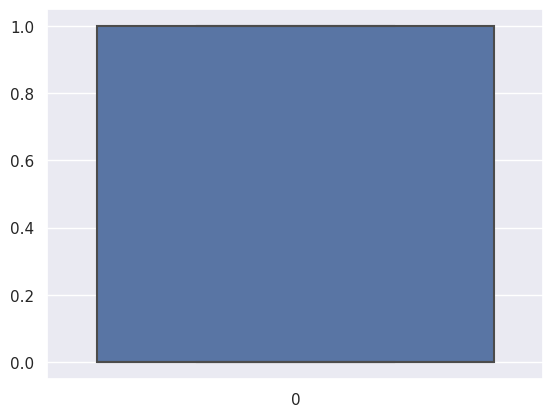

In [ ]:
def boxplots(col):
  sns.boxplot(customer_churn[col])
  plt.show()
for i in list(customer_churn.select_dtypes(exclude=['object']).columns)[1:]:
  boxplots(i)

Inference:- There are no outliers from the boxplots

To find the distribution of data we are ploting distribution plots

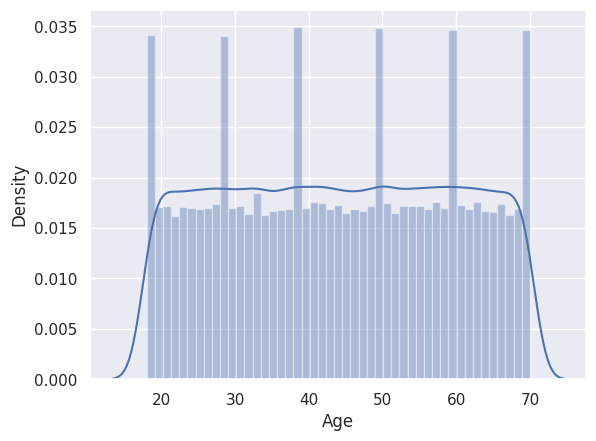

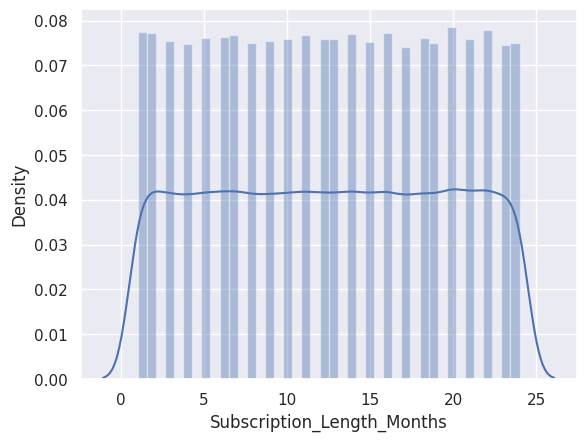

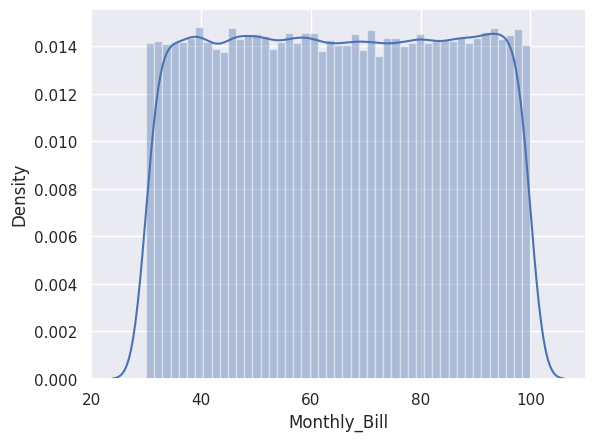

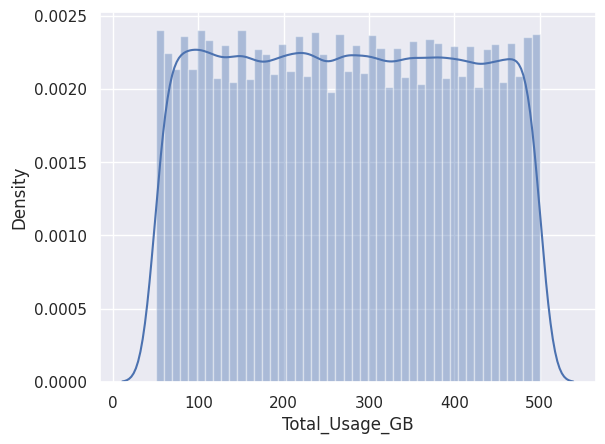

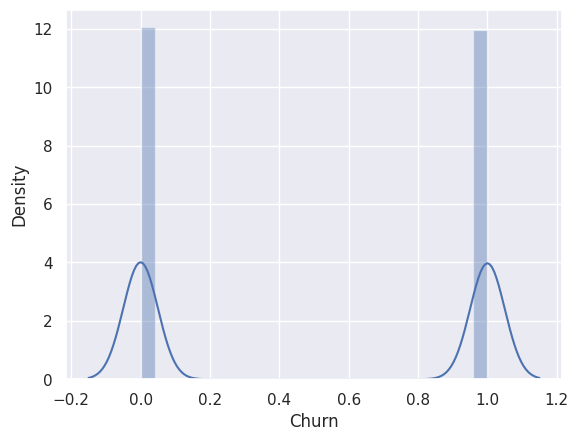

In [ ]:
def distplots(col):
  sns.distplot(customer_churn[col])
  plt.show()
for i in list(customer_churn.select_dtypes(exclude=['object']).columns)[1:]:
  distplots(i)


Advanced EDA
Done using pandas_profiling

---



In [ ]:
!pip install pandas_profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e977e2e1298f4e750c3137adb70377b962d97fbfd051693dbc507724ba9431dc
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(customer_churn)
profile.to_file(output_file = 'customer_churn.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
os.getcwd()

'/content'

To check correlation between features we use Heatmaps

In [ ]:
customer_churn.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


<Axes: >

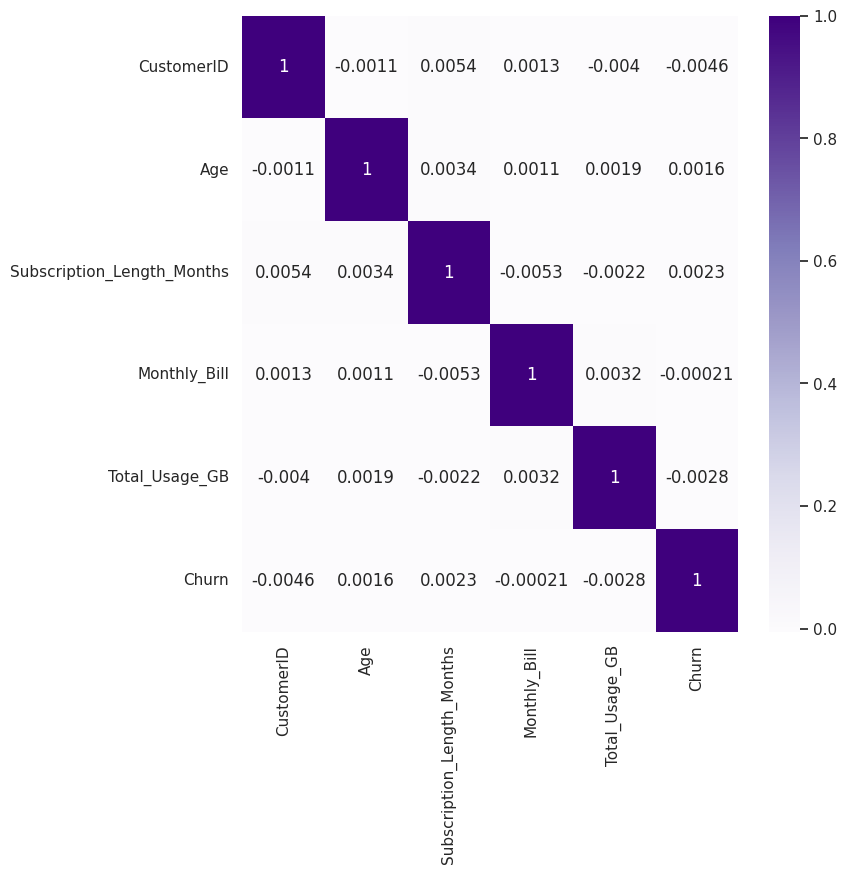

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(customer_churn.corr(),cmap ='Purples', annot =True)

There exist strong correlation between variables.Correlation measured between +1 and -1.Here the diagonal existance of strong colour shows correlation between churn and all variables.

To view statistical details like percentage,mean,standard deviation etc we use describe()

<Axes: ylabel='Churn'>

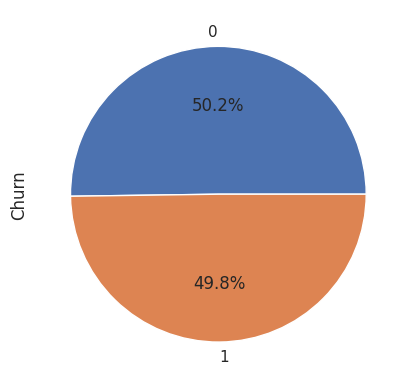

In [ ]:
customer_churn['Churn'].value_counts().plot(kind = 'pie', autopct ='%1.1f%%')

To analyse age v/s Churn

Text(0.5, 1.0, 'Age v/s Churn')

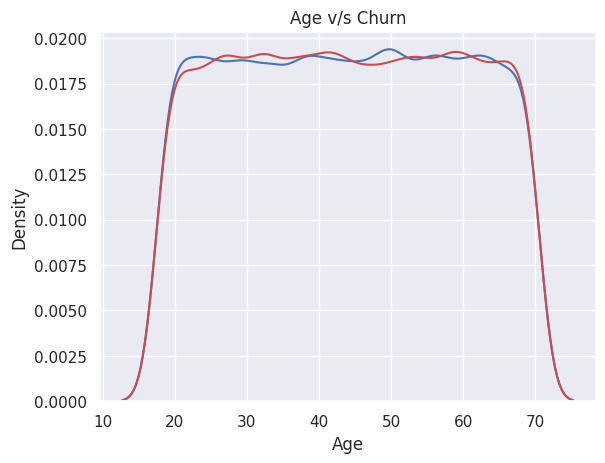

In [ ]:
sns.distplot(customer_churn[customer_churn['Churn']==0]['Age'], hist = False,label ='0')
sns.distplot(customer_churn[customer_churn['Churn']==1]['Age'],hist = False, color = 'r', label ='1')
plt.title("Age v/s Churn")

Text(0.5, 1.0, 'Monthly_Bill v/s Churn')

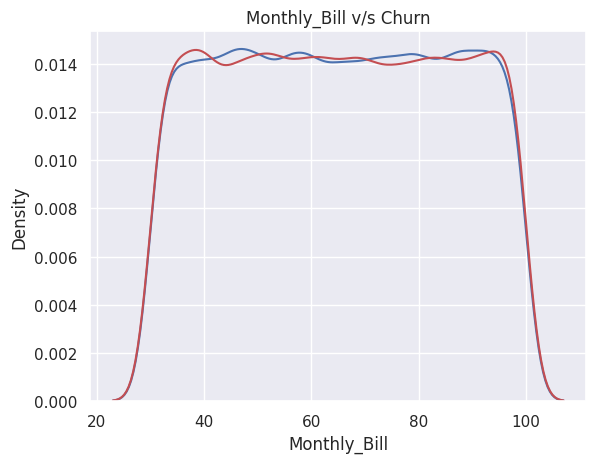

In [ ]:
sns.distplot(customer_churn[customer_churn['Churn']==0]['Monthly_Bill'], hist = False,label ='0')
sns.distplot(customer_churn[customer_churn['Churn']==1]['Monthly_Bill'],hist = False, color = 'r', label ='1')
plt.title("Monthly_Bill v/s Churn")

Text(0.5, 1.0, 'Total_Usage_GB v/s Churn')

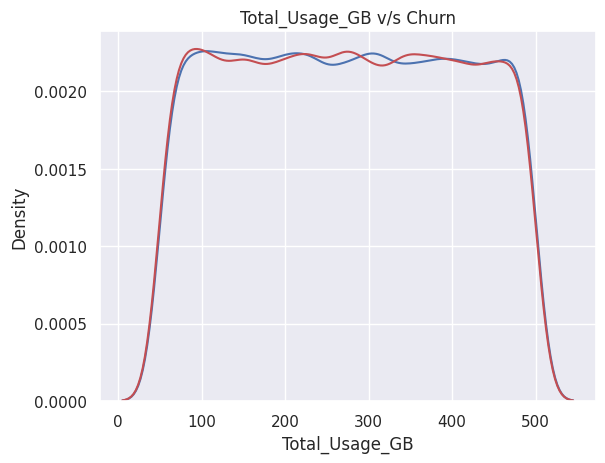

In [ ]:
sns.distplot(customer_churn[customer_churn['Churn']==0]['Total_Usage_GB'], hist = False,label ='0')
sns.distplot(customer_churn[customer_churn['Churn']==1]['Total_Usage_GB'],hist = False, color = 'r', label ='1')
plt.title("Total_Usage_GB v/s Churn")

Relation between Gender and Churn

Text(0.5, 1.0, 'Gender v/s Churn')

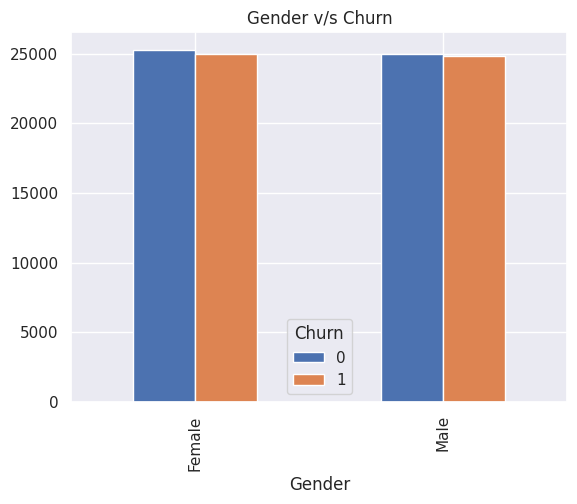

In [ ]:
gender_wise = pd.crosstab(customer_churn['Gender'], customer_churn['Churn'])
gender_wise.plot(kind = 'bar')
plt.title('Gender v/s Churn')

In Female customer there is lesser probability to churn.But in Male customer there is some what equal probability of churn and not churn.

Relation between Monthly_Bill and Churn

Text(0.5, 1.0, 'Monthly_Bill v/s Churn')

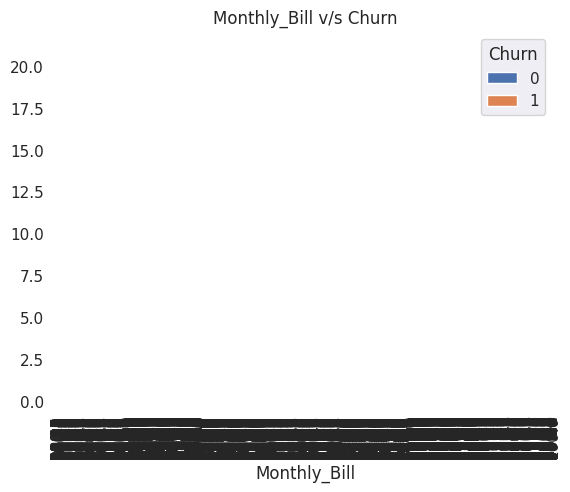

In [ ]:
monbill_wise = pd.crosstab(customer_churn['Monthly_Bill'], customer_churn['Churn'])
monbill_wise.plot(kind = 'bar')
plt.title('Monthly_Bill v/s Churn')

Text(0.5, 1.0, 'Total_Usage_GB v/s Churn')

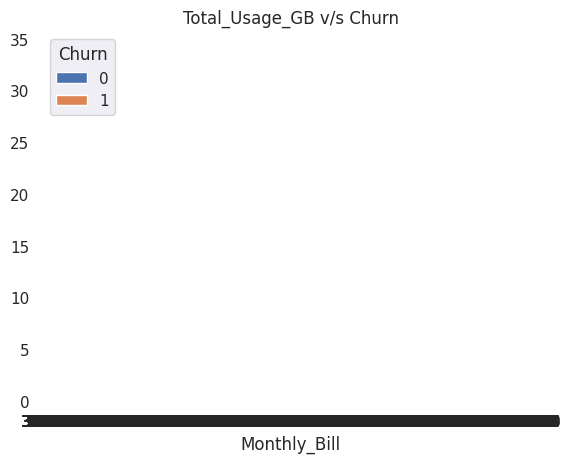

In [ ]:
usage_wise = pd.crosstab(customer_churn['Total_Usage_GB'], customer_churn['Churn'])
monbill_wise.plot(kind = 'bar',stacked = True, rot = 0)
plt.title('Total_Usage_GB v/s Churn')

In [ ]:
customer_churn.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


To find total count of how many customer will churn we use value_counts()

In [ ]:
customer_churn['Churn'].value_counts()/(len(customer_churn))*100

0    50.221
1    49.779
Name: Churn, dtype: float64

Inference:- Here 1 describe customers that will churn usually('yes) and it represents a tottal of 49.779
And customers who donot churn and will continue to use the service is about 50.221

In [ ]:
#"""
churn_no = customer_churn[customer_churn['Churn'] == 0]
churn_yes =customer_churn[customer_churn['Churn'] == 1 ]
#"""

In [ ]:
churn_no.shape, churn_yes.shape

((50221, 9), (49779, 9))

Here yes or 1 is the minority class.So there is a class imbalance between no and yes data sets.To handle this class imbalance of minority we use over sampling method.The target is minority.

In [ ]:
churn_yes.head(2)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
5,6,Customer_6,67,Male,New York,15,82.65,456,1


In [ ]:
customer_churn.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [ ]:
customer_churn['Monthly_Bill'].value_counts()

84.37     34
61.99     29
38.26     28
66.38     28
56.17     28
          ..
77.04      4
91.04      3
64.01      3
36.55      3
100.00     3
Name: Monthly_Bill, Length: 7001, dtype: int64

In [ ]:
customer_churn['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [ ]:
customer_churn['Age'].value_counts()

33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56    1872
25    1871
37    1870
62    1867
46    1865
68    1863
43    1863
36    1859
49    1854
64    1848
47    1847
35    1845
18    1839
65    1833
45    1827
52    1824
32    1810
67    1798
34    1797
22    1787
Name: Age, dtype: int64

In [ ]:
customer_churn['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [ ]:
customer_churn['Subscription_Length_Months'].value_counts()

20    4303
22    4267
1     4247
16    4229
2     4228
14    4213
7     4211
11    4200
6     4184
5     4171
18    4171
12    4155
21    4154
13    4154
10    4151
3     4136
9     4134
15    4122
24    4113
8     4106
19    4106
4     4098
23    4083
17    4064
Name: Subscription_Length_Months, dtype: int64

In [ ]:
customer_churn['Total_Usage_GB'].value_counts()

72     270
232    261
86     260
218    259
153    256
      ... 
174    187
328    187
418    186
180    173
390    172
Name: Total_Usage_GB, Length: 451, dtype: int64

In [ ]:
for i in customer_churn.columns:
  print("*****************************************************", i,
        "*******************************************************")
  print()
  print(set(customer_churn[i].tolist()))
  print()


***************************************************** CustomerID *******************************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 

In [ ]:
customer_churn['Total_Usage_GB'] = customer_churn['Total_Usage_GB'].replace(" ",np.nan)

In [ ]:
customer_churn.shape

(100000, 9)

In [ ]:
customer_churn = customer_churn.reset_index()[customer_churn.columns]
customer_churn['Total_Usage_GB'] = customer_churn['Total_Usage_GB'].astype(float)

In [ ]:
customer_churn.shape

(100000, 9)

To change categorical values into numerical values we use dummies

---



In [ ]:
customer_churn.columns

Index(['CustomerID', 'Name', 'Age', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'Gender_Male'],
      dtype='object')

In [ ]:
customer_churn = pd.get_dummies(customer_churn, columns =['Age','Gender_Male','Location','Subscription_Length_Months'], drop_first = True)

In [ ]:
customer_churn.shape

(100000, 85)

In [ ]:
customer_churn.head()

,CustomerID,Name,Monthly_Bill,Total_Usage_GB,Churn,Age_19,Age_20,Age_21,Age_22,Age_23,...,Subscription_Length_Months_15,Subscription_Length_Months_16,Subscription_Length_Months_17,Subscription_Length_Months_18,Subscription_Length_Months_19,Subscription_Length_Months_20,Subscription_Length_Months_21,Subscription_Length_Months_22,Subscription_Length_Months_23,Subscription_Length_Months_24
0,1,Customer_1,0.410606,-0.294289,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,Customer_2,-0.805374,-0.784852,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Customer_3,1.009204,1.422681,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Customer_4,1.625597,0.173279,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Customer_5,-0.341720,-0.064338,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Feature scaling Required

---



In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar_columns = ['Monthly_Bill', 'Total_Usage_GB' ]
customer_churn[scalar_columns] = scalar.fit_transform(customer_churn[scalar_columns])


In [ ]:
customer_churn.head()

,CustomerID,Name,Monthly_Bill,Total_Usage_GB,Churn,Age_19,Age_20,Age_21,Age_22,Age_23,...,Subscription_Length_Months_15,Subscription_Length_Months_16,Subscription_Length_Months_17,Subscription_Length_Months_18,Subscription_Length_Months_19,Subscription_Length_Months_20,Subscription_Length_Months_21,Subscription_Length_Months_22,Subscription_Length_Months_23,Subscription_Length_Months_24
0,1,Customer_1,0.410606,-0.294289,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,Customer_2,-0.805374,-0.784852,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Customer_3,1.009204,1.422681,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Customer_4,1.625597,0.173279,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Customer_5,-0.341720,-0.064338,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Split data into independent and dependent variables

In [ ]:
x = customer_churn.drop(['CustomerID','Name','Churn'], axis =1)
y= customer_churn['Churn']

In [ ]:
x.head()

,Monthly_Bill,Total_Usage_GB,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,...,Subscription_Length_Months_15,Subscription_Length_Months_16,Subscription_Length_Months_17,Subscription_Length_Months_18,Subscription_Length_Months_19,Subscription_Length_Months_20,Subscription_Length_Months_21,Subscription_Length_Months_22,Subscription_Length_Months_23,Subscription_Length_Months_24
0,0.410606,-0.294289,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.805374,-0.784852,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.009204,1.422681,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.625597,0.173279,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.341720,-0.064338,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

Habling imbalance data since target is minority class.so we use the technique SMOTE.

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print("***************"*10)
print(y_smote.value_counts())

0    50221
1    49779
Name: Churn, dtype: int64
******************************************************************************************************************************************************
0    50221
1    50221
Name: Churn, dtype: int64


In [ ]:
print(x.shape)
print(x_smote.shape)

(100000, 82)
(100442, 82)


In [ ]:
print(y.shape)
print(y_smote.shape)

(100000,)
(100442,)


Now both x_smote and y_smote have got same shape and now we can split the data into train and test

Split data into train and test

---



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state =101)

EDA done with dtale

In [ ]:
!pip install sweetviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 9.0 MB/s eta 0:00:00


In [ ]:
import sweetviz
reports = sweetviz.analyze([customer_churn , 'Train'],target_feat = 'Churn')
reports.show_html('sweetzreport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetzreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Logistic Regression

---



In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_logit_train = logit.predict(x_train)
y_pred_logit_test = logit.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
print(classification_report(y_train,y_pred_logit_train))
print("***********************************************"*10)
print(classification_report(y_test,y_pred_logit_test))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52     35129
           1       0.52      0.51      0.51     35180

    accuracy                           0.52     70309
   macro avg       0.52      0.52      0.52     70309
weighted avg       0.52      0.52      0.52     70309

**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.51      0.51      0.51     15092
           1       0.51      0.50      0.50     15041

    accuracy                          

In [ ]:
print(accuracy_score(y_train,y_pred_logit_train))
print("************************************"*10)
print(accuracy_score(y_test , y_pred_logit_test))

0.5168470608314725
************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
0.5062224139647562


In [ ]:
customer_churn.columns

Index(['CustomerID', 'Name', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
       'Age_19', 'Age_20', 'Age_21', 'Age_22', 'Age_23', 'Age_24', 'Age_25',
       'Age_26', 'Age_27', 'Age_28', 'Age_29', 'Age_30', 'Age_31', 'Age_32',
       'Age_33', 'Age_34', 'Age_35', 'Age_36', 'Age_37', 'Age_38', 'Age_39',
       'Age_40', 'Age_41', 'Age_42', 'Age_43', 'Age_44', 'Age_45', 'Age_46',
       'Age_47', 'Age_48', 'Age_49', 'Age_50', 'Age_51', 'Age_52', 'Age_53',
       'Age_54', 'Age_55', 'Age_56', 'Age_57', 'Age_58', 'Age_59', 'Age_60',
       'Age_61', 'Age_62', 'Age_63', 'Age_64', 'Age_65', 'Age_66', 'Age_67',
       'Age_68', 'Age_69', 'Age_70', 'Gender_Male_1', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York',
       'Subscription_Length_Months_2', 'Subscription_Length_Months_3',
       'Subscription_Length_Months_4', 'Subscription_Length_Months_5',
       'Subscription_Length_Months_6', 'Subscription_Length_Months_7',
       'Subscription_Length_Mont

In [ ]:
customer_churn['CustomerID'].value_counts()

1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: CustomerID, Length: 100000, dtype: int64

In [ ]:
x_test.columns

Index(['Monthly_Bill', 'Total_Usage_GB', 'Age_19', 'Age_20', 'Age_21',
       'Age_22', 'Age_23', 'Age_24', 'Age_25', 'Age_26', 'Age_27', 'Age_28',
       'Age_29', 'Age_30', 'Age_31', 'Age_32', 'Age_33', 'Age_34', 'Age_35',
       'Age_36', 'Age_37', 'Age_38', 'Age_39', 'Age_40', 'Age_41', 'Age_42',
       'Age_43', 'Age_44', 'Age_45', 'Age_46', 'Age_47', 'Age_48', 'Age_49',
       'Age_50', 'Age_51', 'Age_52', 'Age_53', 'Age_54', 'Age_55', 'Age_56',
       'Age_57', 'Age_58', 'Age_59', 'Age_60', 'Age_61', 'Age_62', 'Age_63',
       'Age_64', 'Age_65', 'Age_66', 'Age_67', 'Age_68', 'Age_69', 'Age_70',
       'Gender_Male_1', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York', 'Subscription_Length_Months_2',
       'Subscription_Length_Months_3', 'Subscription_Length_Months_4',
       'Subscription_Length_Months_5', 'Subscription_Length_Months_6',
       'Subscription_Length_Months_7', 'Subscription_Length_Months_8',
       'Subscription_Length_Mon

In [ ]:
customer_churn['probability1'] =logit.predict_proba(customer_churn[x_test.columns])[:, 0]

In [ ]:
customer_churn

,CustomerID,Name,Monthly_Bill,Total_Usage_GB,Churn,Age_19,Age_20,Age_21,Age_22,Age_23,...,Subscription_Length_Months_16,Subscription_Length_Months_17,Subscription_Length_Months_18,Subscription_Length_Months_19,Subscription_Length_Months_20,Subscription_Length_Months_21,Subscription_Length_Months_22,Subscription_Length_Months_23,Subscription_Length_Months_24,probability1
0,1,Customer_1,0.410606,-0.294289,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.518734
1,2,Customer_2,-0.805374,-0.784852,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.480142
2,3,Customer_3,1.009204,1.422681,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.546152
3,4,Customer_4,1.625597,0.173279,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.469951
4,5,Customer_5,-0.341720,-0.064338,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.484984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,-0.490504,-0.370939,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.471766
99996,99997,Customer_99997,-0.168220,0.587191,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.484435
99997,99998,Customer_99998,1.535140,-0.179313,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.512901
99998,99999,Customer_99999,-0.781153,1.223390,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.502742


In [ ]:
customer_churn['probability'] = logit.predict_proba(customer_churn[x_test.columns])[:,1]

In [ ]:
customer_churn.head()

,CustomerID,Name,Monthly_Bill,Total_Usage_GB,Churn,Age_19,Age_20,Age_21,Age_22,Age_23,...,Subscription_Length_Months_17,Subscription_Length_Months_18,Subscription_Length_Months_19,Subscription_Length_Months_20,Subscription_Length_Months_21,Subscription_Length_Months_22,Subscription_Length_Months_23,Subscription_Length_Months_24,probability1,probability
0,1,Customer_1,0.410606,-0.294289,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.518734,0.481266
1,2,Customer_2,-0.805374,-0.784852,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.480142,0.519858
2,3,Customer_3,1.009204,1.422681,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.546152,0.453848
3,4,Customer_4,1.625597,0.173279,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.469951,0.530049
4,5,Customer_5,-0.341720,-0.064338,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.484984,0.515016


In [ ]:
customer_churn[['CustomerID','probability']].tail(20)

,CustomerID,probability
99980,99981,0.522142
99981,99982,0.474823
99982,99983,0.481255
99983,99984,0.499949
99984,99985,0.542334
99985,99986,0.504100
99986,99987,0.498978
99987,99988,0.500012
99988,99989,0.507483
99989,99990,0.516116


Pycaret package -automation

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 4.2 MB/s eta 0:

In [ ]:
from pycaret.classification import *

In [ ]:
classification =setup(data = customer_churn, target = 'Churn', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(100000, 87)"
4,Transformed data shape,"(100000, 87)"
5,Transformed train set shape,"(70000, 87)"
6,Transformed test set shape,"(30000, 87)"
7,Numeric features,85
8,Categorical features,1
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5041,0.5049,0.3313,0.5028,0.3992,0.0066,0.0071,1.3330
lr,Logistic Regression,0.5022,0.5047,0.0000,0.0000,0.0000,0.0000,0.0000,2.2010
knn,K Neighbors Classifier,0.5022,0.5025,0.4968,0.5000,0.4984,0.0044,0.0044,11.3140
dt,Decision Tree Classifier,0.5022,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.1860
ridge,Ridge Classifier,0.5022,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.3050
rf,Random Forest Classifier,0.5022,0.5033,0.0000,0.0000,0.0000,0.0000,0.0000,9.5330
qda,Quadratic Discriminant Analysis,0.5022,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0870
ada,Ada Boost Classifier,0.5022,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.1570
gbc,Gradient Boosting Classifier,0.5022,0.4998,0.0000,0.0000,0.0000,0.0000,0.0000,10.5740
lda,Linear Discriminant Analysis,0.5022,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,2.9610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

The Gaussian Naive Bayes give more accuracy than all other models .so we are going to fine tune it.

In [ ]:
naive=create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4980,0.4986,0.3504,0.4941,0.4100,-0.0053,-0.0055
1,0.5057,0.5053,0.3142,0.5058,0.3876,0.0098,0.0106
2,0.5044,0.5074,0.3426,0.5034,0.4077,0.0075,0.0079
3,0.5056,0.5096,0.3228,0.5054,0.3940,0.0096,0.0103
4,0.5067,0.4994,0.3406,0.5068,0.4074,0.0120,0.0127
5,0.5003,0.5089,0.2942,0.4966,0.3695,-0.0013,-0.0014
6,0.5039,0.5021,0.3278,0.5024,0.3967,0.0061,0.0065
7,0.4951,0.4992,0.3327,0.4894,0.3961,-0.0112,-0.0118
8,0.5114,0.5091,0.3585,0.5131,0.4221,0.0215,0.0225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_naive = tune_model(naive)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5007,0.4985,0.3690,0.4981,0.4239,0.0003,0.0003
1,0.5060,0.5084,0.3429,0.5057,0.4087,0.0106,0.0112
2,0.5077,0.5044,0.3518,0.5081,0.4157,0.0141,0.0148
3,0.5033,0.5057,0.3426,0.5017,0.4072,0.0052,0.0055
4,0.5069,0.5055,0.3845,0.5062,0.4371,0.0127,0.0131
5,0.5046,0.5103,0.3100,0.5037,0.3838,0.0074,0.0080
6,0.5057,0.5072,0.3553,0.5049,0.4171,0.0101,0.0105
7,0.4943,0.4954,0.3496,0.4888,0.4076,-0.0128,-0.0133
8,0.5063,0.5059,0.3901,0.5052,0.4402,0.0115,0.0118


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_naive)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Hyperparameter** tuning

---



Gridsearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(priors=None, var_smoothing=0.23101297000831597)


In [ ]:
print("Detailed Classification Report:")
y_true, lr_pred = y_test , nbModel_grid.predict(x_test)
print(classification_report( y_true, lr_pred))
print("**********************************************")
print(accuracy_score(y_true,lr_pred))

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.37      0.43     15092
           1       0.50      0.63      0.56     15041

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.49     30133
weighted avg       0.50      0.50      0.49     30133

**********************************************
0.499983406896094


By Hyperparameter tunning accuracy doesnt increased.Rather it decreased from 50 to 49